# **High-Performance Computing Dashboard**

#### The HPC Insight Dashboard serves as a visualization tool designed to provide users with insights into the performance metrics of various HPC (High-Performance Computing) systems. Through this dashboard, users can easily compare and contrast the capabilities of different HPC systems for Data Science Tasks, allowing for informed decision-making and analysis within the HPC domain.

In [77]:
# Importing necessary libraries.
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import parallel_coordinates 

# Loading dataset into dataframe.
df_super_computers = pd.read_csv("Data_Set/TOP500.csv", encoding='ISO-8859-2')
pd.set_option("display.max_columns", None)

# Observing first five rows of the dataframe.
df_super_computers.head()

,Rank,Previous Rank,First Appearance,First Rank,Name,Computer,Site,Manufacturer,Country,Year,Segment,Total Cores,Accelerator/Co-Processor Cores,Rmax [TFlop/s],Rpeak [TFlop/s],Nmax,Nhalf,HPCG [TFlop/s],Power (kW),Power Source,Power Efficiency [GFlops/Watts],Architecture,Processor,Processor Technology,Processor Speed (MHz),Operating System,OS Family,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent,Site ID,System ID
0,1,1.0,55,1,Supercomputer Fugaku,"Supercomputer Fugaku, A64FX 48C 2.2GHz, Tofu i...",RIKEN Center for Computational Science,Fujitsu,Japan,2020,Research,"7,630,848",NaN,"442,010.00","537,212.00","21,288,960",NaN,"16,004.50","29,899.23",Submitted,14.78,MPP,A64FX 48C 2.2GHz,Fujitsu ARM,"2,200",Red Hat Enterprise Linux,Linux,NaN,48,Fujitsu A64FX,Supercomputer Fugaku,Fujitsu Cluster,Proprietary Network,Tofu interconnect D,Asia,"50,831",179807
1,2,2.0,51,1,Summit,"IBM Power System AC922, IBM POWER9 22C 3.07GHz...",DOE/SC/Oak Ridge National Laboratory,IBM,United States,2018,Research,"2,414,592","2,211,840","148,600.00","200,794.88","16,473,600",NaN,"2,925.75","10,096.00",Submitted,14.72,Cluster,IBM POWER9 22C 3.07GHz,Power,"3,070",RHEL 7.4,Linux,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,"48,553",179397
2,3,3.0,51,3,Sierra,"IBM Power System AC922, IBM POWER9 22C 3.1GHz,...",DOE/NNSA/LLNL,IBM / NVIDIA / Mellanox,United States,2018,Research,"1,572,480","1,382,400","94,640.00","125,712.00","11,902,464",NaN,"1,795.67","7,438.28",Submitted,12.72,Cluster,IBM POWER9 22C 3.1GHz,Power,"3,100",Red Hat Enterprise Linux,Linux,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,"49,763",179398
3,4,4.0,47,1,Sunway TaihuLight,"Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway",National Supercomputing Center in Wuxi,NRCPC,China,2016,Research,"10,649,600",NaN,"93,014.59","125,435.90","12,288,000",NaN,480.85,"15,371.00",Submitted,6.05,MPP,Sunway SW26010 260C 1.45GHz,ShenWei,"1,450",Sunway RaiseOS 2.0.5,Linux,NaN,260,Sunway,Sunway MPP,Sunway Cluster,Custom Interconnect,Sunway,Asia,"50,623",178764
4,5,7.0,55,7,Selene,"NVIDIA DGX A100, AMD EPYC 7742 64C 2.25GHz, NV...",NVIDIA Corporation,Nvidia,United States,2020,Vendor,"555,520","483,840","63,460.00","79,215.00","6,598,656",NaN,"1,622.51","2,646.00",Submitted,23.98,Cluster,AMD EPYC 7742 64C 2.25GHz,AMD Zen-2 (Rome),"2,250",Ubuntu 20.04.1 LTS,Linux,NVIDIA A100,64,AMD Rome,NVIDIA DGX A100,NVIDIA DGX,Infiniband,Mellanox HDR Infiniband,North America,"48,448",179842


In [78]:
# Observing last five rows of the dataframe.
df_super_computers.tail()

,Rank,Previous Rank,First Appearance,First Rank,Name,Computer,Site,Manufacturer,Country,Year,Segment,Total Cores,Accelerator/Co-Processor Cores,Rmax [TFlop/s],Rpeak [TFlop/s],Nmax,Nhalf,HPCG [TFlop/s],Power (kW),Power Source,Power Efficiency [GFlops/Watts],Architecture,Processor,Processor Technology,Processor Speed (MHz),Operating System,OS Family,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent,Site ID,System ID
495,496,459.0,52,237,NaN,"HPE SGI 8600, Xeon Gold 6148 20C 2.4GHz, 4xEDR...",Central Research Institute of Electric Power I...,HPE,Japan,2018,Research,"26,400",NaN,"1,326.25","2,027.52","2,525,184",NaN,NaN,357.55,Submitted,3.71,Cluster,Xeon Gold 6148 20C 2.4GHz,Intel Skylake,"2,400",Red Hat Enterprise Linux,Linux,NaN,20,Xeon Gold,HPE SGI 8600,HPE SGI 8600,Infiniband,4xEDR Infiniband,Asia,"47,530",179563
496,497,460.0,50,96,Taiwania,"PRIMERGY CX2550 M4/CX2560 M4/CX2570 M4, Xeon G...",National Center for High Performance Computing,Fujitsu,Taiwan,2017,Research,"27,200",NaN,"1,325.15","2,088.96","3,707,904",NaN,NaN,332.00,Submitted,3.99,Cluster,Xeon Gold 6148 20C 2.4GHz,Intel Skylake,"2,400",Linux,Linux,NaN,20,Xeon Gold,PRIMERGY CX2550 M4/CX2560 M4/CX2570 M4,Fujitsu PRIMERGY,Omnipath,Intel Omni-Path,Asia,"48,468",179170
497,498,461.0,51,149,Internet Company T EE2,"Lenovo HR650x, Xeon Gold 6133 20C 2.5GHz, 25G ...",Service Provider T,Lenovo,China,2018,Industry,"30,000",NaN,"1,319.52","2,400.00","3,794,688",NaN,NaN,NaN,NaN,NaN,Cluster,Xeon Gold 6133 20C 2.5GHz,Intel Skylake,"2,500",Linux,Linux,NaN,20,Xeon Gold,ThinkSystem HR650X,Lenovo ThinkSystem,Gigabit Ethernet,25G Ethernet,Asia,"50,329",179352
498,499,462.0,51,150,Internet Company T EE1,"Lenovo HR650x, Xeon Gold 6133 20C 2.5GHz, 25G ...",Service Provider T,Lenovo,China,2018,Industry,"30,000",NaN,"1,319.52","2,400.00","3,794,688",NaN,NaN,NaN,NaN,NaN,Cluster,Xeon Gold 6133 20C 2.5GHz,Intel Skylake,"2,500",Linux,Linux,NaN,20,Xeon Gold,ThinkSystem HR650X,Lenovo ThinkSystem,Gigabit Ethernet,25G Ethernet,Asia,"50,329",179353
499,500,463.0,51,303,Internet Company T FF1,"Lenovo HR650x, Xeon Gold 6133 20C 2.5GHz, 25G ...",Service Provider T,Lenovo,China,2018,Industry,"29,920",NaN,"1,316.84","2,393.60","3,789,696",NaN,NaN,NaN,NaN,NaN,Cluster,Xeon Gold 6133 20C 2.5GHz,Intel Skylake,"2,500",Linux,Linux,NaN,20,Xeon Gold,ThinkSystem HR650X,Lenovo ThinkSystem,Gigabit Ethernet,25G Ethernet,Asia,"50,329",179351


In [79]:
# Observing shape and columns of the dataset.
df_super_computers.shape, df_super_computers.columns

((500, 37),
 Index(['Rank', 'Previous Rank', 'First Appearance', 'First Rank', 'Name',
        'Computer', 'Site', 'Manufacturer', 'Country', 'Year', 'Segment',
        'Total Cores', 'Accelerator/Co-Processor Cores', 'Rmax [TFlop/s]',
        'Rpeak [TFlop/s]', 'Nmax', 'Nhalf', 'HPCG [TFlop/s]', 'Power (kW)',
        'Power Source', 'Power Efficiency [GFlops/Watts]', 'Architecture',
        'Processor', 'Processor Technology', 'Processor Speed (MHz)',
        'Operating System', 'OS Family', 'Accelerator/Co-Processor',
        'Cores per Socket', 'Processor Generation', 'System Model',
        'System Family', 'Interconnect Family', 'Interconnect', 'Continent',
        'Site ID', 'System ID'],
       dtype='object'))

In [80]:
# Observing information of the dataset.
df_super_computers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rank                             500 non-null    int64  
 1   Previous Rank                    456 non-null    float64
 2   First Appearance                 500 non-null    int64  
 3   First Rank                       500 non-null    int64  
 4   Name                             315 non-null    object 
 5   Computer                         500 non-null    object 
 6   Site                             500 non-null    object 
 7   Manufacturer                     500 non-null    object 
 8   Country                          500 non-null    object 
 9   Year                             500 non-null    int64  
 10  Segment                          500 non-null    object 
 11  Total Cores                      500 non-null    object 
 12  Accelerator/Co-Process

In [81]:
# Observing statistics of the numeric columns.
df_super_computers.describe()

,Rank,Previous Rank,First Appearance,First Rank,Year,Power Efficiency [GFlops/Watts],Cores per Socket,System ID
count,500.000000,456.000000,500.000000,500.000000,500.000000,189.000000,500.000000,500.000000
mean,250.500000,233.633772,52.090000,139.912000,2018.230000,4.873280,21.456000,179492.582000
std,144.481833,133.554153,3.418372,93.871807,1.569084,4.833064,15.546944,447.186187
min,1.000000,1.000000,35.000000,1.000000,2010.000000,0.190000,4.000000,176908.000000
25%,125.750000,119.750000,51.000000,67.750000,2018.000000,2.080000,16.000000,179410.500000
50%,250.500000,233.500000,53.000000,128.500000,2018.000000,3.290000,20.000000,179626.500000
75%,375.250000,349.250000,54.000000,195.250000,2019.000000,4.990000,20.000000,179775.500000
max,500.000000,463.000000,56.000000,466.000000,2020.000000,26.200000,260.000000,179910.000000


In [82]:
# Observing sum of the missing value per column.
missing_value_count_per_column = df_super_computers.isnull().sum()
# Calculating total cells in the dataframe.
total_cell_count = np.product(df_super_computers.shape)
# Calculating total missing count.
total_missing_value_count = missing_value_count_per_column.sum()
# Calculating missing value percentage of the dataset.
percent_missing = (total_missing_value_count/total_cell_count)*100
print(f"Percentage of missing values:{percent_missing}")

Percentage of missing values:15.05945945945946


In [83]:
# Observing Missing value percentage per column.
missing_value_count_per_column/len(df_super_computers)*100

Rank                                0.0
Previous Rank                       8.8
First Appearance                    0.0
First Rank                          0.0
Name                               37.0
Computer                            0.0
Site                                0.0
Manufacturer                        0.0
Country                             0.0
Year                                0.0
Segment                             0.0
Total Cores                         0.0
Accelerator/Co-Processor Cores     70.2
Rmax [TFlop/s]                      0.0
Rpeak [TFlop/s]                     0.0
Nmax                                1.0
Nhalf                              97.6
HPCG [TFlop/s]                     85.4
Power (kW)                         62.2
Power Source                       62.2
Power Efficiency [GFlops/Watts]    62.2
Architecture                        0.0
Processor                           0.0
Processor Technology                0.0
Processor Speed (MHz)               0.0


Accelerator/Co-Processor Cores, Nhalf, HPCG [TFlop/s], Power (kW),
Power Source, Power Efficiency [GFlops/Watts] and Accelerator/Co-Processor 
columns have over 60% missing values per columns therefore those columns 
are dropping from the dataframe.

In [84]:
# Making copy of the "df_super_computers" for further analysis.
df_copy = df_super_computers.copy()
# Dropping high percentage of missing value columns and unnecessary 
# columns for further analysis.
columns_to_drop = [
    'Accelerator/Co-Processor Cores', 
    'Nhalf', 
    'HPCG [TFlop/s]', 
    'Power (kW)', 
    'Power Source', 
    'Power Efficiency [GFlops/Watts]', 
    'Accelerator/Co-Processor',
    'Computer',
    'Processor'
]
df_copy.drop(columns=columns_to_drop, axis=1, inplace=True)

In [85]:
# Removing commas from 'Nmax' column.
columns_to_remove_comma = [
    'Total Cores', 
    'Rmax [TFlop/s]', 
    'Rpeak [TFlop/s]',
    'Nmax',
    'Processor Speed (MHz)',
    'Site ID'
]
for column in columns_to_remove_comma:
    # Replacing comma.
    df_copy[column] = df_copy[column].str.replace(',', '')

In [86]:
# List of columns to convert to numeric.
numeric_columns = [
    'Rank', 
    'Previous Rank', 
    'First Appearance', 
    'First Rank', 
    'Year',
    'Cores per Socket', 
    'Nmax', 
    'Total Cores', 
    'Rmax [TFlop/s]', 
    'Rpeak [TFlop/s]', 
    'Processor Speed (MHz)', 
    'System ID', 
    'Site ID'
]
# Converting columns to numeric, handling errors by coercing invalid
# values to NaN and round it for better visualization.
for col in numeric_columns:
    df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce').round()

df_copy.head()

,Rank,Previous Rank,First Appearance,First Rank,Name,Site,Manufacturer,Country,Year,Segment,Total Cores,Rmax [TFlop/s],Rpeak [TFlop/s],Nmax,Architecture,Processor Technology,Processor Speed (MHz),Operating System,OS Family,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent,Site ID,System ID
0,1,1.0,55,1,Supercomputer Fugaku,RIKEN Center for Computational Science,Fujitsu,Japan,2020,Research,7630848,442010.0,537212.0,21288960.0,MPP,Fujitsu ARM,2200,Red Hat Enterprise Linux,Linux,48,Fujitsu A64FX,Supercomputer Fugaku,Fujitsu Cluster,Proprietary Network,Tofu interconnect D,Asia,50831,179807
1,2,2.0,51,1,Summit,DOE/SC/Oak Ridge National Laboratory,IBM,United States,2018,Research,2414592,148600.0,200795.0,16473600.0,Cluster,Power,3070,RHEL 7.4,Linux,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,48553,179397
2,3,3.0,51,3,Sierra,DOE/NNSA/LLNL,IBM / NVIDIA / Mellanox,United States,2018,Research,1572480,94640.0,125712.0,11902464.0,Cluster,Power,3100,Red Hat Enterprise Linux,Linux,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,49763,179398
3,4,4.0,47,1,Sunway TaihuLight,National Supercomputing Center in Wuxi,NRCPC,China,2016,Research,10649600,93015.0,125436.0,12288000.0,MPP,ShenWei,1450,Sunway RaiseOS 2.0.5,Linux,260,Sunway,Sunway MPP,Sunway Cluster,Custom Interconnect,Sunway,Asia,50623,178764
4,5,7.0,55,7,Selene,NVIDIA Corporation,Nvidia,United States,2020,Vendor,555520,63460.0,79215.0,6598656.0,Cluster,AMD Zen-2 (Rome),2250,Ubuntu 20.04.1 LTS,Linux,64,AMD Rome,NVIDIA DGX A100,NVIDIA DGX,Infiniband,Mellanox HDR Infiniband,North America,48448,179842


In [87]:
# Handling missing values.
# Filling missing values in the 'Preveious Rank' column by its median.
df_copy['Previous Rank'] = df_copy[
    'Previous Rank'
].fillna(df_copy['Previous Rank'].median())

# Filling missing values in the 'Nmax' column by its median.
df_copy['Nmax'] = df_copy['Nmax'].fillna(df_copy['Nmax'].median())

# Filling missing values in the 'Name' column by placeholder.
df_copy['Name'] = df_copy['Name'].fillna('Unknown')

In [88]:
df_copy.isnull().sum()

Rank                     0
Previous Rank            0
First Appearance         0
First Rank               0
Name                     0
Site                     0
Manufacturer             0
Country                  0
Year                     0
Segment                  0
Total Cores              0
Rmax [TFlop/s]           0
Rpeak [TFlop/s]          0
Nmax                     0
Architecture             0
Processor Technology     0
Processor Speed (MHz)    0
Operating System         0
OS Family                0
Cores per Socket         0
Processor Generation     0
System Model             0
System Family            0
Interconnect Family      0
Interconnect             0
Continent                0
Site ID                  0
System ID                0
dtype: int64

In [89]:
# Dropping duplicates.
df_copy.drop_duplicates(inplace=True)

In [90]:
# Normalizing text data columns.
columns_to_normalize = [
    'Name',  
    'Site', 
    'Manufacturer', 
    'Country', 
    'Segment', 
    'Architecture', 
    'Processor Technology', 
    'Operating System', 
    'OS Family', 
    'Processor Generation', 
    'System Model', 
    'System Family', 
    'Interconnect Family', 
    'Interconnect', 
    'Continent']
for feature in columns_to_normalize:
    df_copy[feature] = df_copy[feature].str.lower().str.strip()
df_copy.head()

,Rank,Previous Rank,First Appearance,First Rank,Name,Site,Manufacturer,Country,Year,Segment,Total Cores,Rmax [TFlop/s],Rpeak [TFlop/s],Nmax,Architecture,Processor Technology,Processor Speed (MHz),Operating System,OS Family,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent,Site ID,System ID
0,1,1.0,55,1,supercomputer fugaku,riken center for computational science,fujitsu,japan,2020,research,7630848,442010.0,537212.0,21288960.0,mpp,fujitsu arm,2200,red hat enterprise linux,linux,48,fujitsu a64fx,supercomputer fugaku,fujitsu cluster,proprietary network,tofu interconnect d,asia,50831,179807
1,2,2.0,51,1,summit,doe/sc/oak ridge national laboratory,ibm,united states,2018,research,2414592,148600.0,200795.0,16473600.0,cluster,power,3070,rhel 7.4,linux,22,ibm power9,ibm power system ac922,ibm power systems,infiniband,dual-rail mellanox edr infiniband,north america,48553,179397
2,3,3.0,51,3,sierra,doe/nnsa/llnl,ibm / nvidia / mellanox,united states,2018,research,1572480,94640.0,125712.0,11902464.0,cluster,power,3100,red hat enterprise linux,linux,22,ibm power9,ibm power system ac922,ibm power systems,infiniband,dual-rail mellanox edr infiniband,north america,49763,179398
3,4,4.0,47,1,sunway taihulight,national supercomputing center in wuxi,nrcpc,china,2016,research,10649600,93015.0,125436.0,12288000.0,mpp,shenwei,1450,sunway raiseos 2.0.5,linux,260,sunway,sunway mpp,sunway cluster,custom interconnect,sunway,asia,50623,178764
4,5,7.0,55,7,selene,nvidia corporation,nvidia,united states,2020,vendor,555520,63460.0,79215.0,6598656.0,cluster,amd zen-2 (rome),2250,ubuntu 20.04.1 lts,linux,64,amd rome,nvidia dgx a100,nvidia dgx,infiniband,mellanox hdr infiniband,north america,48448,179842


In [91]:
# Observing unique values in 'Manufacturer' column.
df_copy['Manufacturer'].unique()

array(['fujitsu', 'ibm', 'ibm / nvidia / mellanox', 'nrcpc', 'nvidia',
       'nudt', 'atos', 'dell emc', 'hpe', 'cray/hpe', 'lenovo',
       'fujitsu / lenovo',
       'quanta computer / taiwan fixed network / asus cloud', 'nec',
       'cray inc./hitachi', 'intel', 'sugon', 'penguin computing',
       't-platforms, intel, dell', 'supermicro', 'huawei', 'action',
       'self-made', 'megware', 'clustervision / hammer', 'inspur',
       'lenovo/ibm', 'atipa', 't-platforms', 'nec/megware',
       'amazon web services', 'preferred networks', 'supermicro/dellemc',
       'ntt comm. / ntt pc comm.'], dtype=object)

In [92]:
# Replacing values in the 'Manufacturer' column with corrected values.
df_copy['Manufacturer'] = df_copy['Manufacturer'].replace({
    'ibm / nvidia / mellanox' : 'ibm_nvidia_mellanox', 
    'cray/hpe' : 'cray_hpe', 
    'cray inc./hitachi' : 'cray inc._hitachi', 
    'fujitsu / lenovo' : 'fujitsu_lenovo', 
    'quanta computer / taiwan fixed network / asus cloud' : 'quantacomputer_taiwanfixednetwork_asuscloud', 
    'clustervision / hammer' : 'clustervision_ hammer', 
    'nec/megware' : 'nec_megware', 
    'supermicro/dellemc' : 'supermicro_dellemc', 
    'ntt comm. / ntt pc comm.' : 'nttcomm._nttpccomm.'
})

In [93]:
# Renaming column names to avoid inconsistencies.
columns_names_to_rename = {
    'Previous Rank' : 'Previous_Rank', 
    'First Appearance' : 'First_Appearance', 
    'First Rank' : 'First_Rank',
    'Total Cores' : 'Total_Cores', 
    'Rmax [TFlop/s]' : 'Rmax_[TFlop/s]', 
    'Rpeak [TFlop/s]' : 'Rpeak_[TFlop/s]',
    'Processor Technology' : 'Processor_Technology',
    'Processor Speed (MHz)' : 'Processor_Speed', 
    'Operating System' : 'Operating_System',
    'OS Family' : 'OS_Family',
    'Cores per Socket' : 'Cores_Per_Socket', 
    'Processor Generation' : 'Processor_Generation', 
    'System Model' : 'System_Model',
    'System Family' : 'System_Family', 
    'Interconnect Family' : 'Interconnect_Family',
    'Site ID' : 'Site_ID', 
    'System ID' : 'System_ID'
}
df_copy.rename(columns=columns_names_to_rename, inplace=True)
df_copy.head()

,Rank,Previous_Rank,First_Appearance,First_Rank,Name,Site,Manufacturer,Country,Year,Segment,Total_Cores,Rmax_[TFlop/s],Rpeak_[TFlop/s],Nmax,Architecture,Processor_Technology,Processor_Speed,Operating_System,OS_Family,Cores_Per_Socket,Processor_Generation,System_Model,System_Family,Interconnect_Family,Interconnect,Continent,Site_ID,System_ID
0,1,1.0,55,1,supercomputer fugaku,riken center for computational science,fujitsu,japan,2020,research,7630848,442010.0,537212.0,21288960.0,mpp,fujitsu arm,2200,red hat enterprise linux,linux,48,fujitsu a64fx,supercomputer fugaku,fujitsu cluster,proprietary network,tofu interconnect d,asia,50831,179807
1,2,2.0,51,1,summit,doe/sc/oak ridge national laboratory,ibm,united states,2018,research,2414592,148600.0,200795.0,16473600.0,cluster,power,3070,rhel 7.4,linux,22,ibm power9,ibm power system ac922,ibm power systems,infiniband,dual-rail mellanox edr infiniband,north america,48553,179397
2,3,3.0,51,3,sierra,doe/nnsa/llnl,ibm_nvidia_mellanox,united states,2018,research,1572480,94640.0,125712.0,11902464.0,cluster,power,3100,red hat enterprise linux,linux,22,ibm power9,ibm power system ac922,ibm power systems,infiniband,dual-rail mellanox edr infiniband,north america,49763,179398
3,4,4.0,47,1,sunway taihulight,national supercomputing center in wuxi,nrcpc,china,2016,research,10649600,93015.0,125436.0,12288000.0,mpp,shenwei,1450,sunway raiseos 2.0.5,linux,260,sunway,sunway mpp,sunway cluster,custom interconnect,sunway,asia,50623,178764
4,5,7.0,55,7,selene,nvidia corporation,nvidia,united states,2020,vendor,555520,63460.0,79215.0,6598656.0,cluster,amd zen-2 (rome),2250,ubuntu 20.04.1 lts,linux,64,amd rome,nvidia dgx a100,nvidia dgx,infiniband,mellanox hdr infiniband,north america,48448,179842


In [94]:
# List of columns to convert to integer. 
columns_to_be_int = [
    'Previous_Rank', 
    'Rmax_[TFlop/s]', 
    'Rpeak_[TFlop/s]', 
    'Nmax'
]
for col_name in columns_to_be_int:
    df_copy[col_name] = df_copy[col_name].astype(int)
df_copy.head()

,Rank,Previous_Rank,First_Appearance,First_Rank,Name,Site,Manufacturer,Country,Year,Segment,Total_Cores,Rmax_[TFlop/s],Rpeak_[TFlop/s],Nmax,Architecture,Processor_Technology,Processor_Speed,Operating_System,OS_Family,Cores_Per_Socket,Processor_Generation,System_Model,System_Family,Interconnect_Family,Interconnect,Continent,Site_ID,System_ID
0,1,1,55,1,supercomputer fugaku,riken center for computational science,fujitsu,japan,2020,research,7630848,442010,537212,21288960,mpp,fujitsu arm,2200,red hat enterprise linux,linux,48,fujitsu a64fx,supercomputer fugaku,fujitsu cluster,proprietary network,tofu interconnect d,asia,50831,179807
1,2,2,51,1,summit,doe/sc/oak ridge national laboratory,ibm,united states,2018,research,2414592,148600,200795,16473600,cluster,power,3070,rhel 7.4,linux,22,ibm power9,ibm power system ac922,ibm power systems,infiniband,dual-rail mellanox edr infiniband,north america,48553,179397
2,3,3,51,3,sierra,doe/nnsa/llnl,ibm_nvidia_mellanox,united states,2018,research,1572480,94640,125712,11902464,cluster,power,3100,red hat enterprise linux,linux,22,ibm power9,ibm power system ac922,ibm power systems,infiniband,dual-rail mellanox edr infiniband,north america,49763,179398
3,4,4,47,1,sunway taihulight,national supercomputing center in wuxi,nrcpc,china,2016,research,10649600,93015,125436,12288000,mpp,shenwei,1450,sunway raiseos 2.0.5,linux,260,sunway,sunway mpp,sunway cluster,custom interconnect,sunway,asia,50623,178764
4,5,7,55,7,selene,nvidia corporation,nvidia,united states,2020,vendor,555520,63460,79215,6598656,cluster,amd zen-2 (rome),2250,ubuntu 20.04.1 lts,linux,64,amd rome,nvidia dgx a100,nvidia dgx,infiniband,mellanox hdr infiniband,north america,48448,179842


In [95]:
# Setting the style of seaborn plots.
sns.set_style('darkgrid')

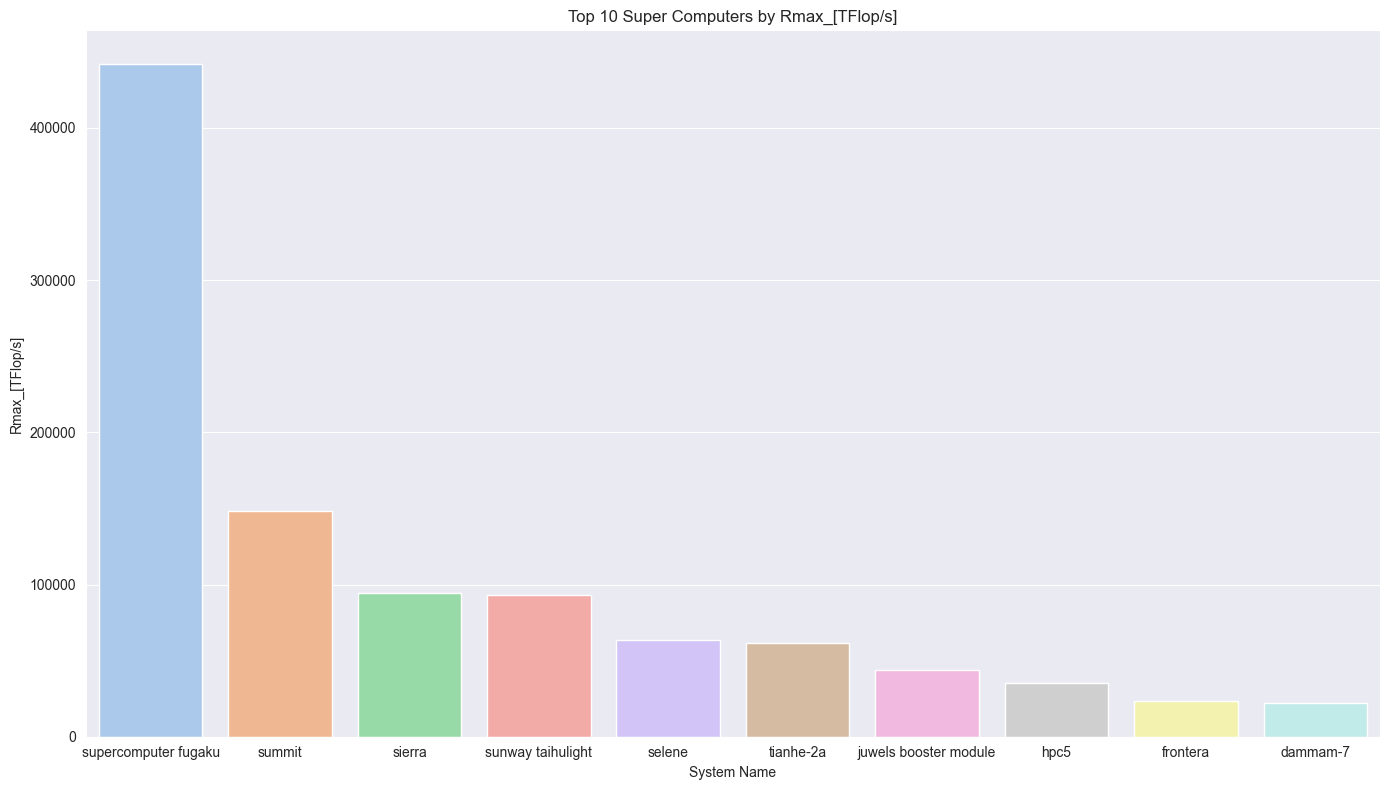

In [96]:
# Selecting the top 10 super computers by 'Rmax_[TFlop/s]'.
top_performers = df_copy.nlargest(10, columns='Rmax_[TFlop/s]')

# Visualizing top 10 super computers by 'Rmax_[TFlop/s]'.
plt.figure(figsize=(14, 8))

sns.barplot(
    data=top_performers, 
    x='Name', 
    y='Rmax_[TFlop/s]', 
    hue='Name', 
    legend=False, 
    palette='pastel'
)

plt.title('Top 10 Super Computers by Rmax_[TFlop/s]')
plt.xlabel('System Name')
plt.ylabel('Rmax_[TFlop/s]')

plt.tight_layout()
plt.show()

Supercomputer fugaku has the highest Rmax_[TFlop/s]. It is almost 470000.

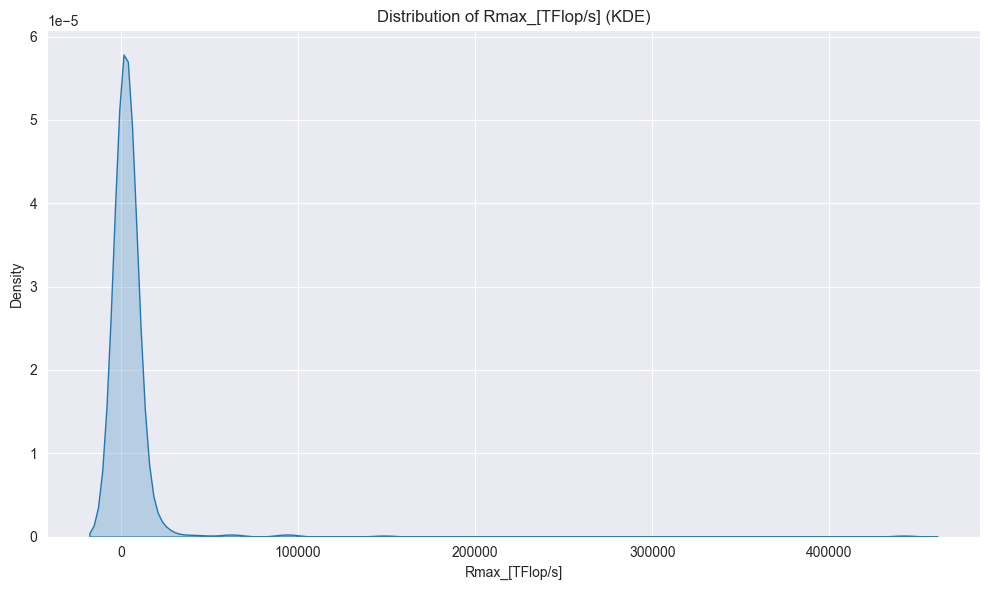

In [97]:
# Visualizing Distribution of Rmax_[TFlop/s] using Kernel Density 
# Plot(KDE).
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_copy['Rmax_[TFlop/s]'], fill=True)
plt.title("Distribution of Rmax_[TFlop/s] (KDE)")
plt.tight_layout()
plt.show()

The distribution of 'Rmax_[TFlop/s]' is skewed to the left. It indicates that there are relatively more supercomputers with lower Rmax values and fewer supercomputers with higher Rmax values. 

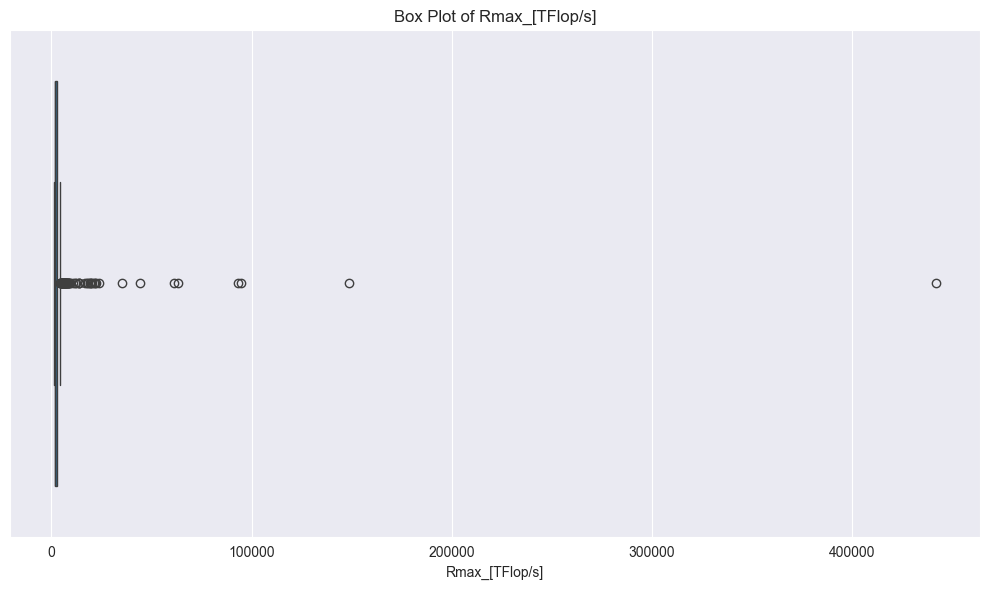

In [98]:
# Creating a Box plot for Rmax.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='Rmax_[TFlop/s]')
plt.title("Box Plot of Rmax_[TFlop/s]")
plt.xlabel('Rmax_[TFlop/s]')
plt.tight_layout()
plt.show()

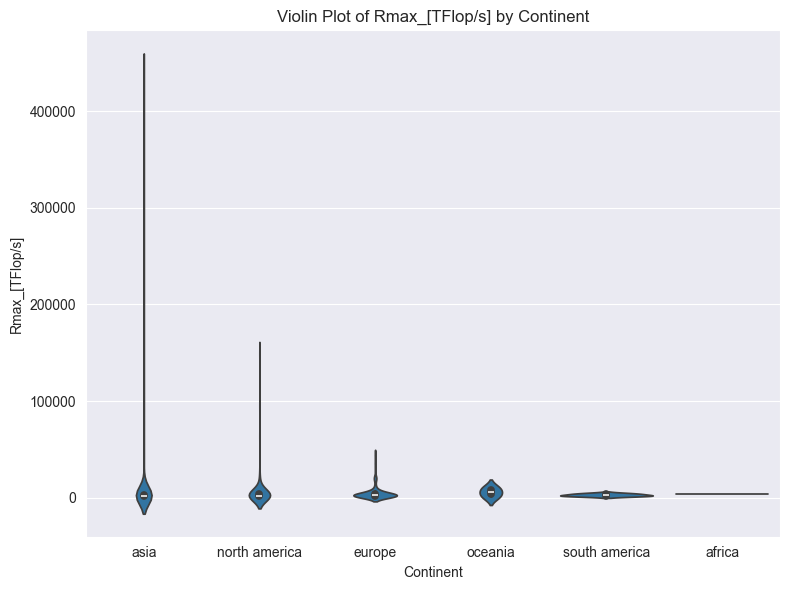

In [99]:
# Creating a violin plot for  Rmax_[TFlop/s] by Continent.
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_copy, x='Continent', y='Rmax_[TFlop/s]')
plt.title("Violin Plot of Rmax_[TFlop/s] by Continent")
plt.xlabel('Continent')
plt.ylabel('Rmax_[TFlop/s]')
plt.tight_layout()
plt.show()

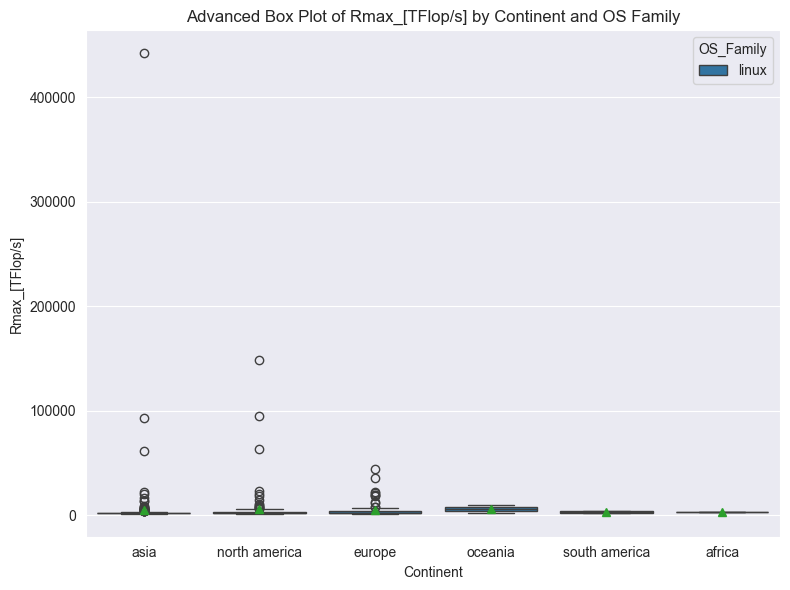

In [100]:
# Visualizing Rmax_[TFlop/s] by Continent and OS Family using Advanced 
# Boxplots.
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_copy, 
    x='Continent', 
    y='Rmax_[TFlop/s]', 
    showmeans=True, 
    hue='OS_Family'
)
plt.title("Advanced Box Plot of Rmax_[TFlop/s] by Continent and OS Family")
plt.xlabel('Continent')

plt.tight_layout()
plt.show()

The highest Rmax values are held by Asia while the lowest values are found in South America and Africa. It may happen because While South America and Africa  are lack of investment, the majority of Asian countries are economically rich and invest more money to the development of new technologies.

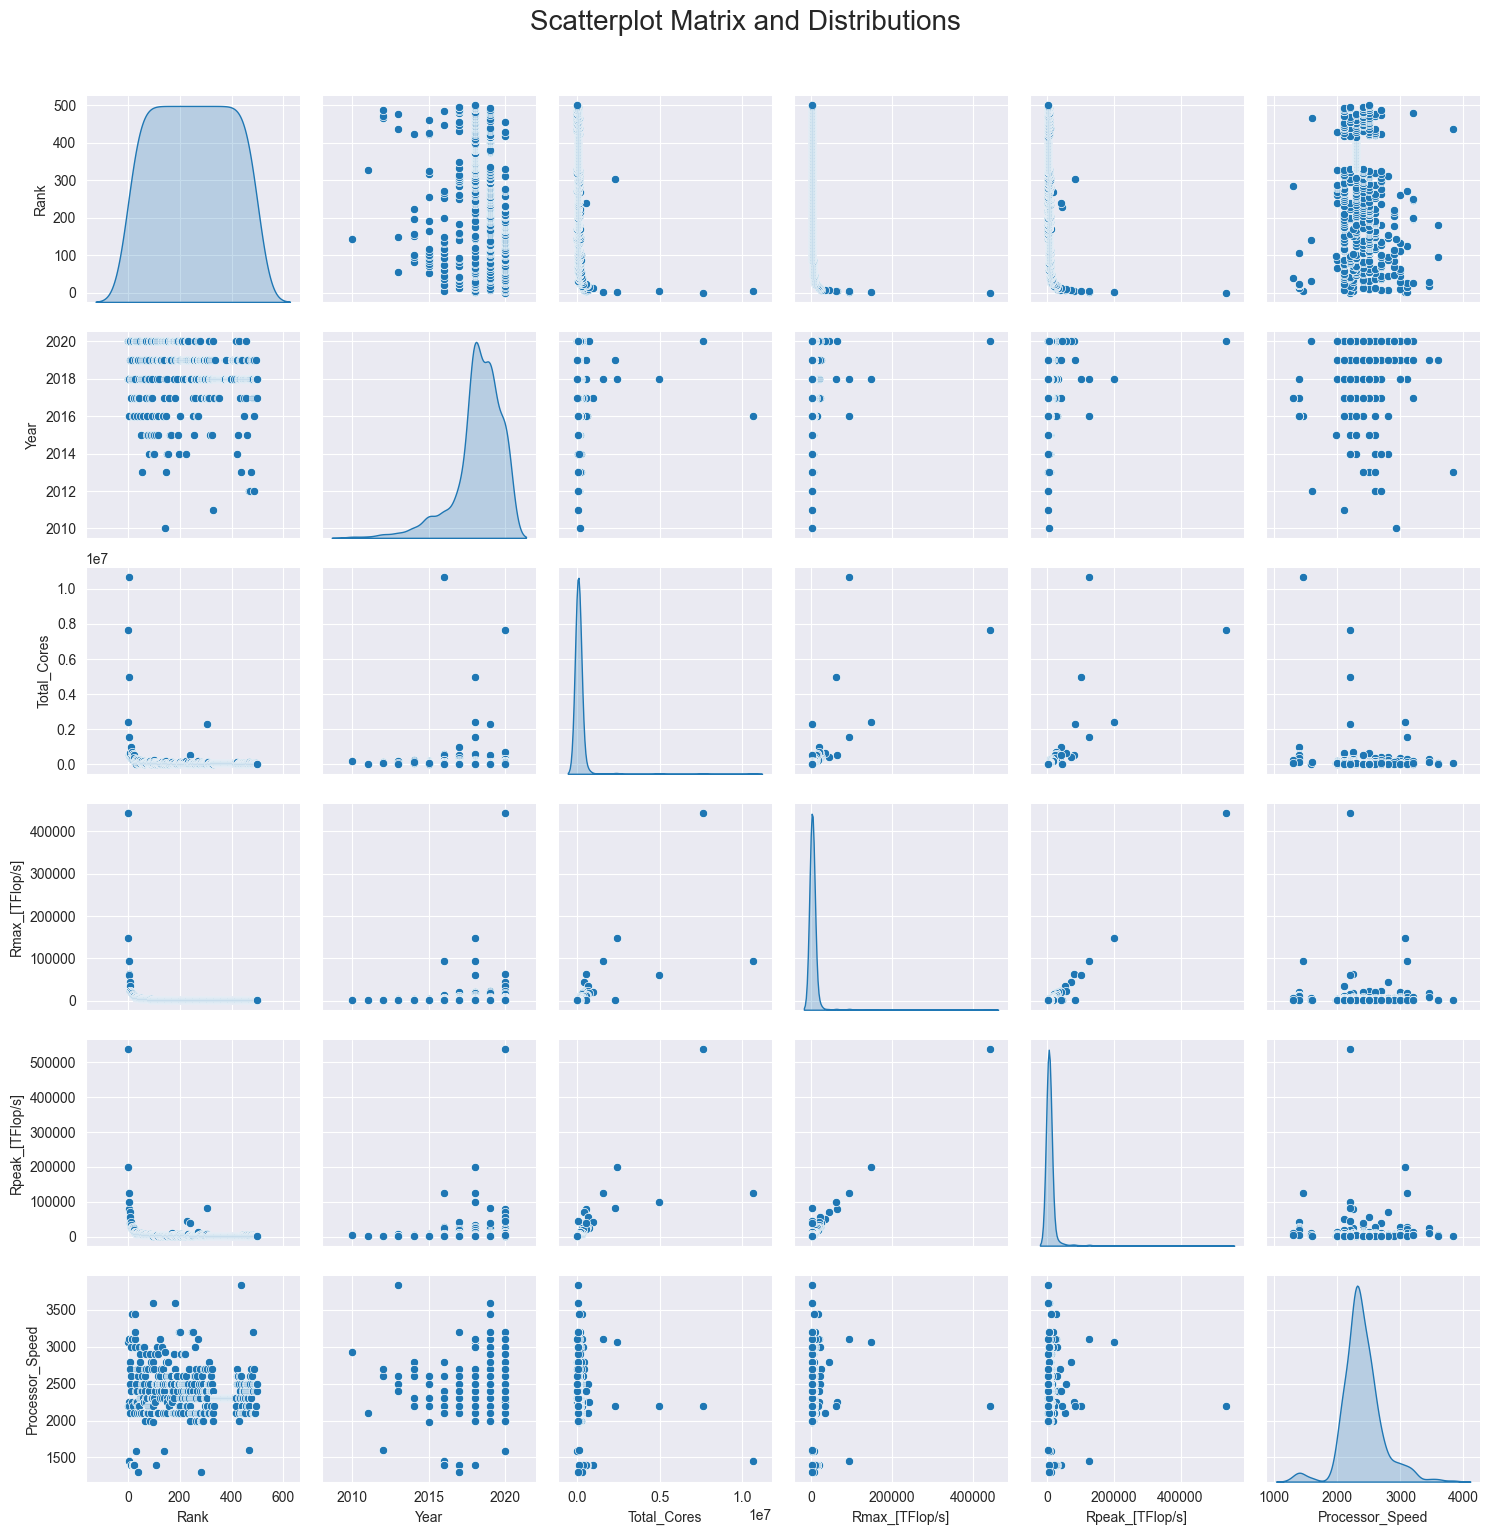

In [101]:
# Visualizing Scatter Plot Matrix and distributions.
sns.pairplot(
    df_copy[[
        'Rank', 
        'Year', 
        'Total_Cores', 
        'Rmax_[TFlop/s]', 
        'Rpeak_[TFlop/s]', 
        'Processor_Speed'
    ]], diag_kind='kde'
) 
plt.suptitle("Scatterplot Matrix and Distributions", y=1.02, fontsize=20)
plt.tight_layout() 
plt.show()

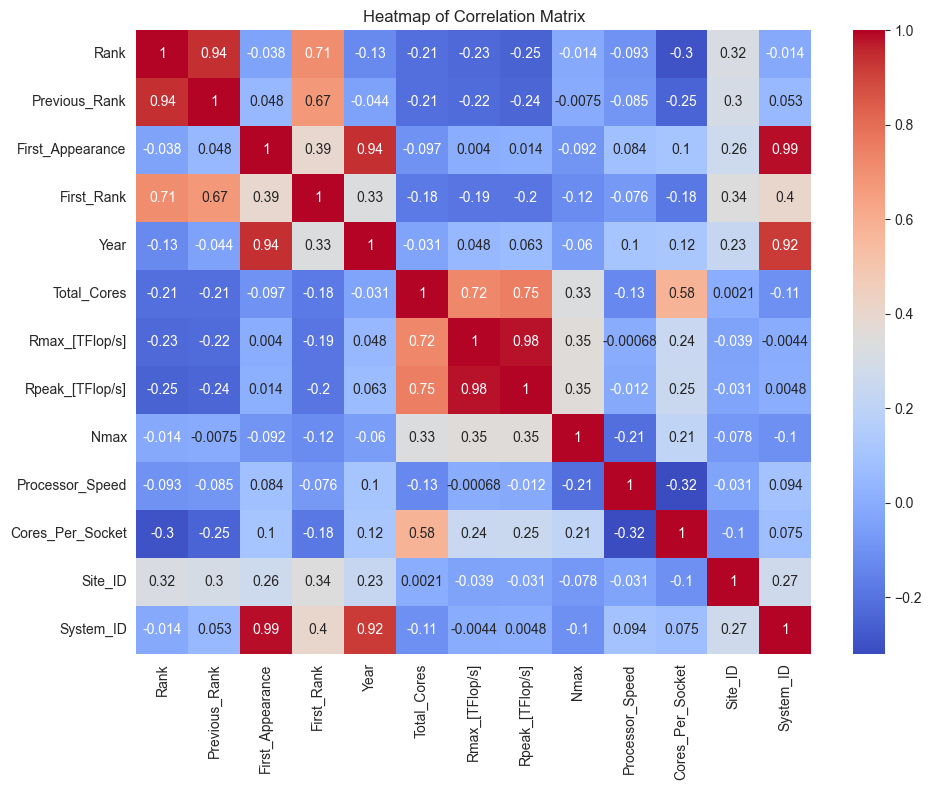

In [102]:
# Selecting numeric columns.
numeric_df = df_copy.select_dtypes(include=[np.number])

# Visualising correlation matrix using heatmap.
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.tight_layout()
plt.show()

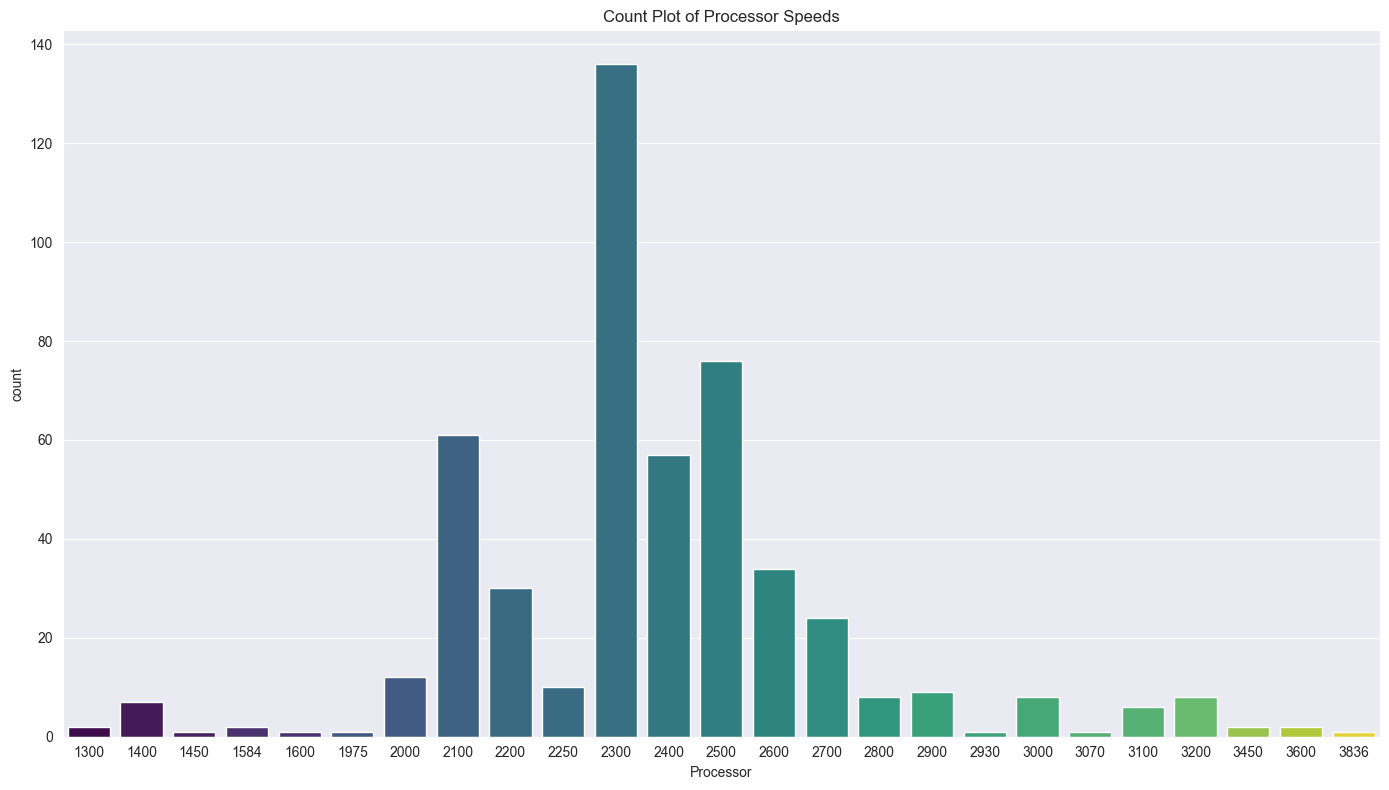

In [103]:
# Visualizing processr speed using count plot.
plt.figure(figsize=(14,8))
sns.countplot(
    x='Processor_Speed', 
    data=df_copy, palette='viridis', 
    legend=False, 
    hue='Processor_Speed'
)
plt.title('Count Plot of Processor Speeds')
plt.xlabel('Processor')
plt.tight_layout()
plt.show()

The count plot indicates that the processor speed "2300" has the highest count, it suggests that this particular processor speed is the most common among the data.

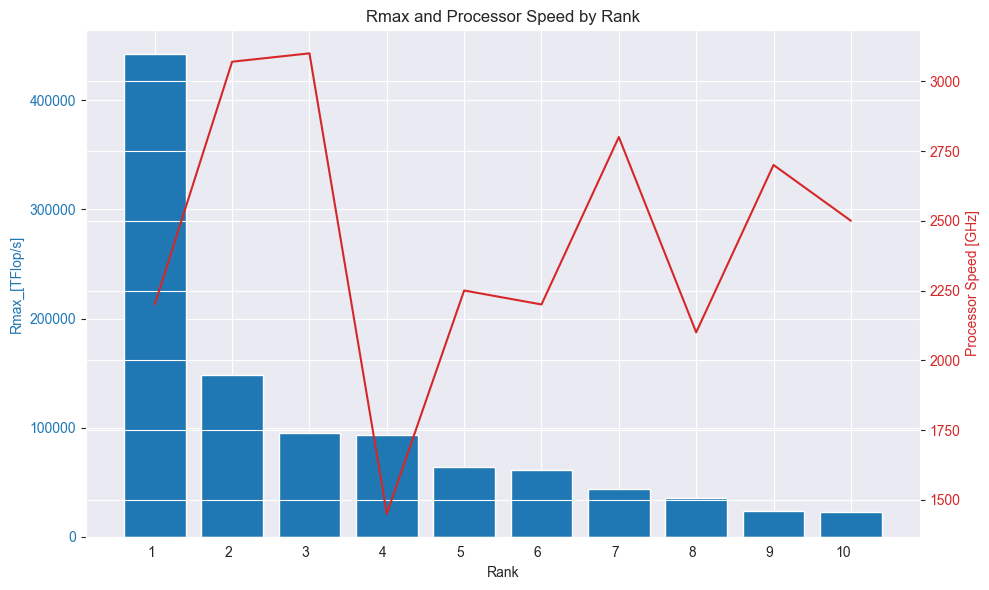

In [104]:
# Creating a combination chart that include bar plot for Rank by Rmax 
# and line plot for Rank by Processor Speed.

# Creating a figure and a single subplot.
fig, ax1 = plt.subplots(figsize=(10, 6))

# Creating Bar plot for Rank by 'Rmax'.
color = 'tab:blue'
ax1.set_xlabel('Rank')
ax1.set_ylabel('Rmax_[TFlop/s]', color=color)
ax1.bar(top_performers['Rank'], top_performers['Rmax_[TFlop/s]'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiating a second axes that shares the same x-axis.
ax2 = ax1.twinx()  

# Creating Line plot for Rank by 'Processor_Speed'.
color = 'tab:red'
ax2.set_ylabel('Processor Speed [GHz]', color=color)
ax2.plot(top_performers['Rank'], top_performers['Processor_Speed'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Inserting title and custom x-axis tick labels.
ax1.set_title('Rmax and Processor Speed by Rank')
ax1.set_xticks(top_performers['Rank'])
ax1.set_xticklabels(top_performers['Rank'].astype(str), ha='right')

# Showing the plot.
fig.tight_layout()
plt.show()

Rank 1 has the highest Rmax value, around 430,000, and a Processor Speed of around 2,200 GHz. On the other hand, Rank 3 has the highest Processor Speed, around 3,100 GHz, with an Rmax value of around 100,000. 

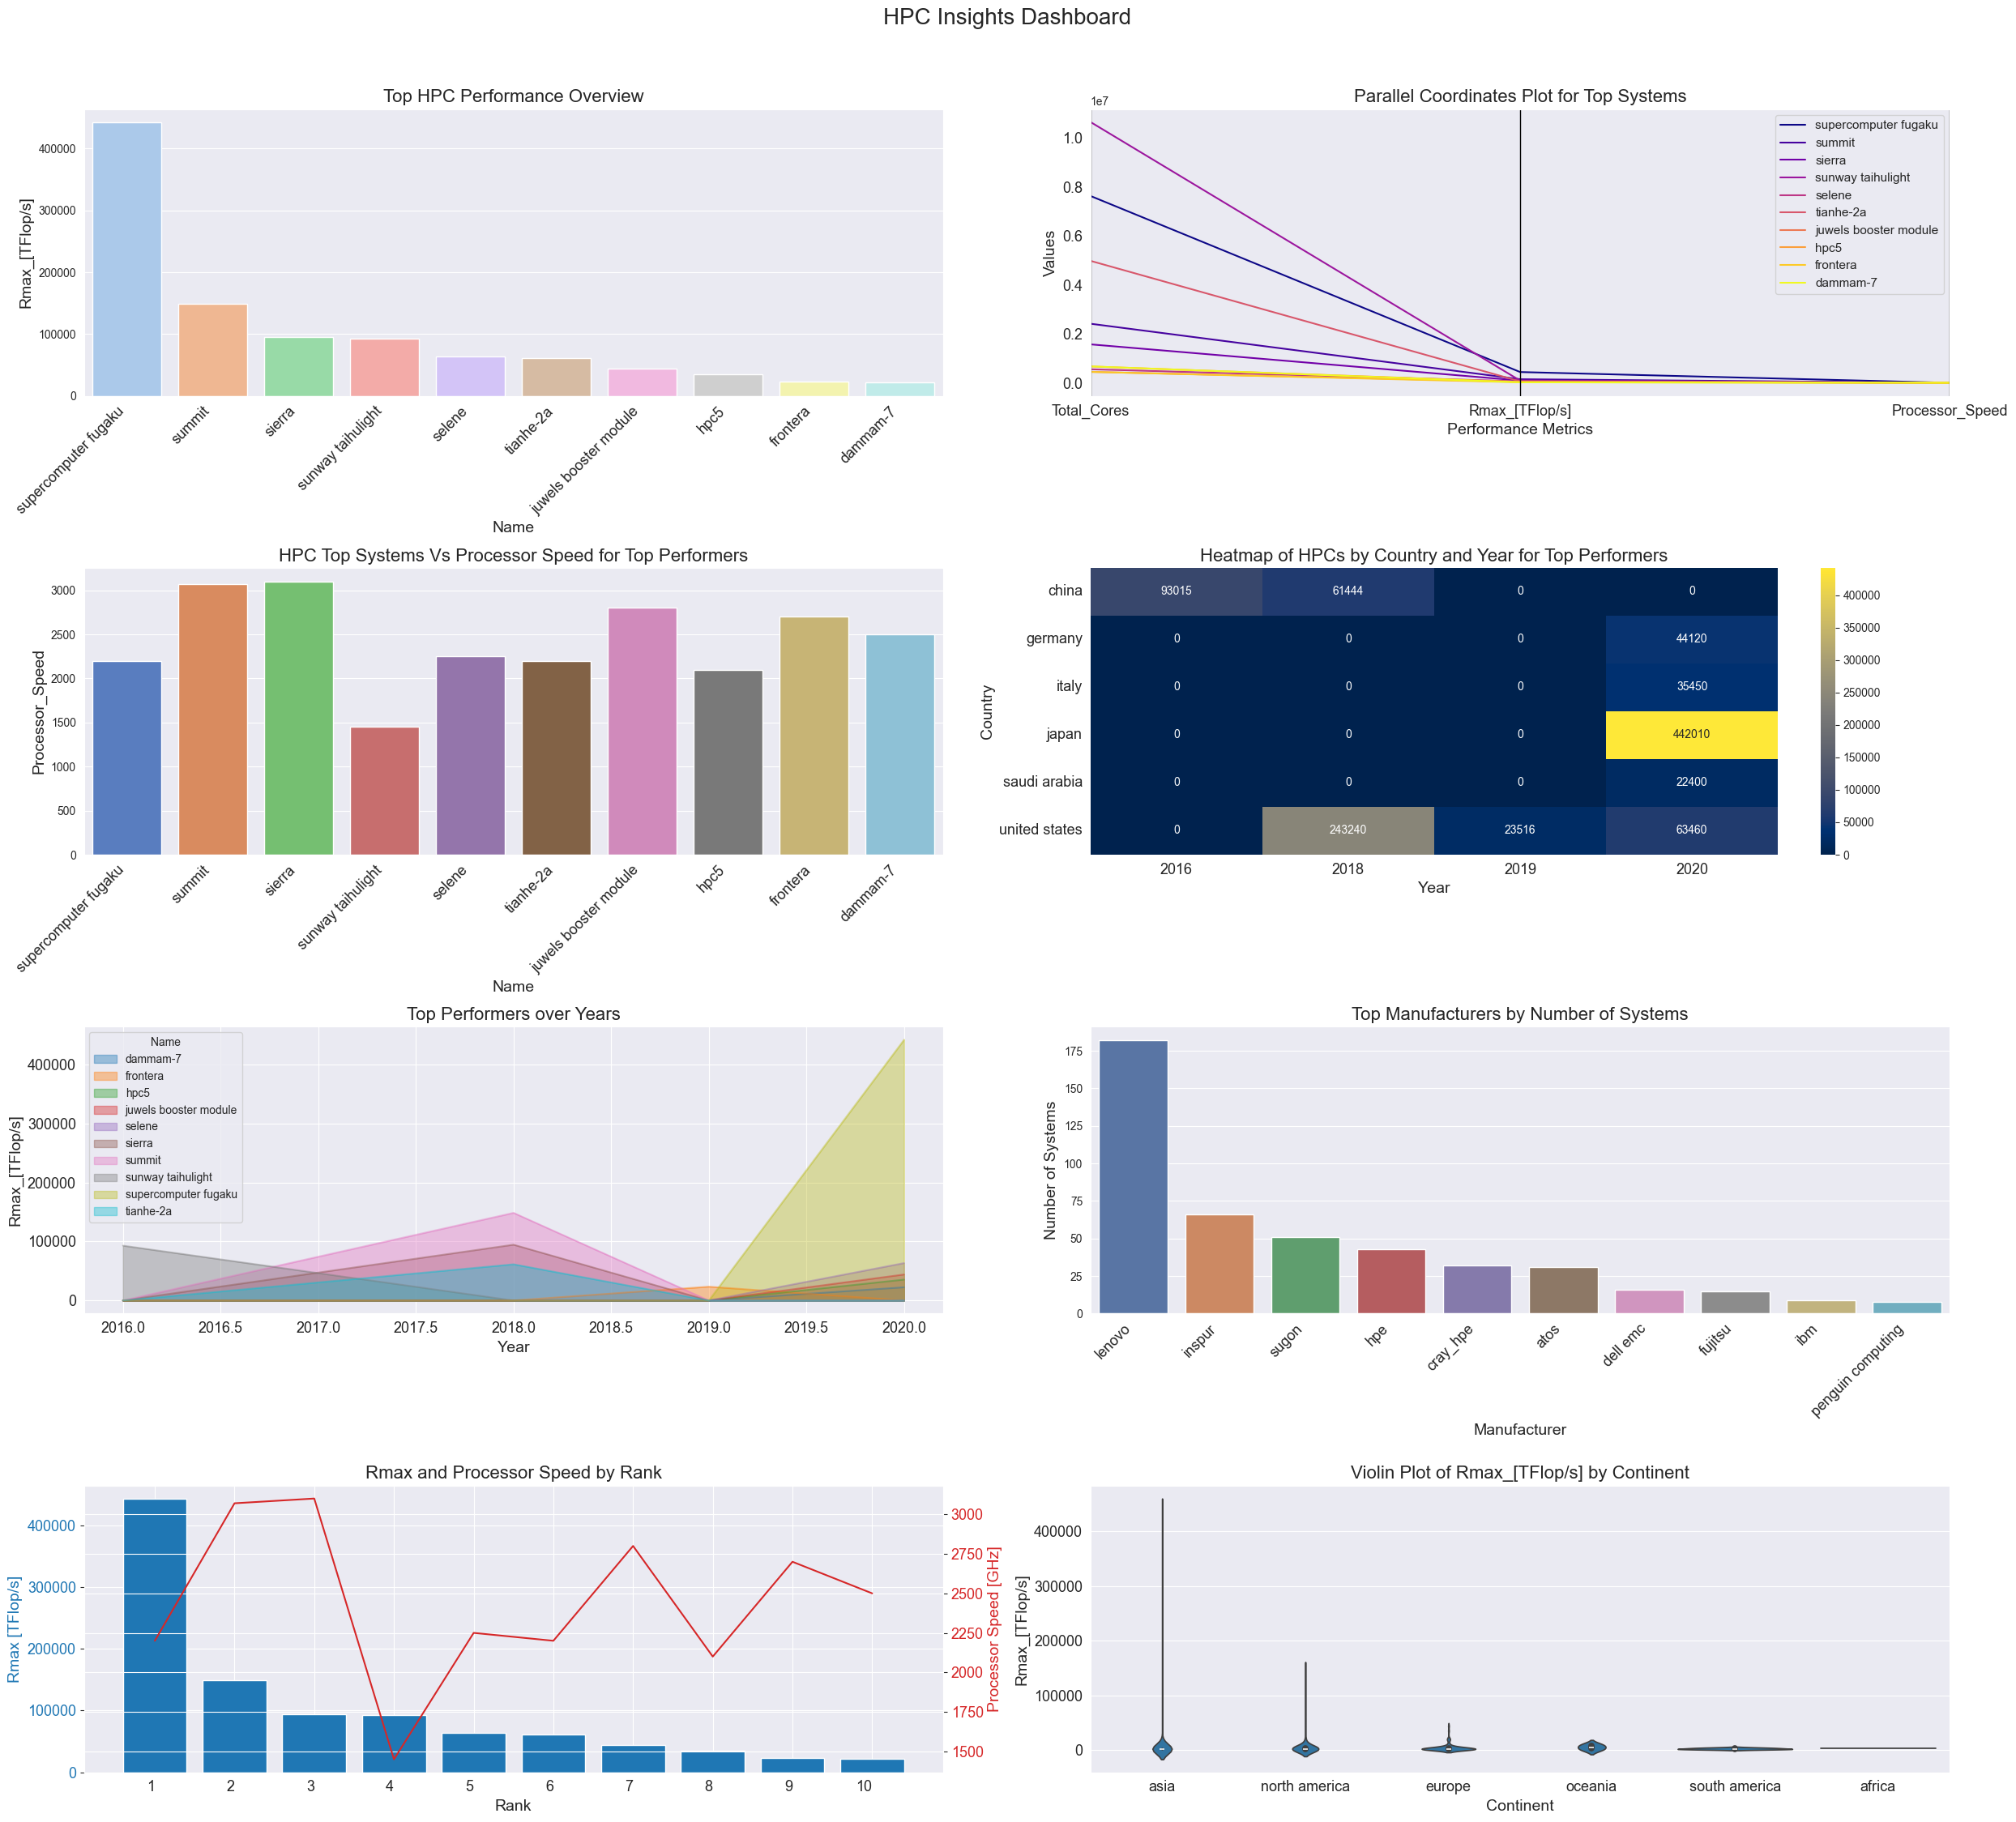

In [106]:
def create_bar_plot(
        dataframe, 
        x_col, y_col, 
        title, 
        ax, 
        hue, 
        palette='pastel', 
        rotation=45
    ):
    """
    # Function to creat a bar plot.
    """
    sns.barplot(
        x=x_col, 
        y=y_col, 
        data=dataframe, 
        hue=hue, 
        palette=palette, 
        ax=ax, 
        legend=False
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticks(range(len(dataframe[x_col])))
    ax.set_xticklabels(
        dataframe[x_col], 
        rotation=rotation, 
        ha='right', 
        fontsize=13
    )
    ax.set_xlabel(x_col, fontsize=14)
    ax.set_ylabel(y_col, fontsize=14)

def create_parallel_plot(
        dataframe, 
        class_column, 
        columns, 
        title, 
        ax, 
        colormap='plasma'
    ):
    """
    # Function to creat a parallel coordinates plot.
    """
    parallel_coordinates(
        dataframe, 
        class_column, 
        cols=columns, 
        colormap=colormap,
        ax=ax
    )
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=11)
    ax.set_title(title, fontsize=16)
    ax.tick_params(axis='both', labelsize=13)
    ax.set_xlabel('Performance Metrics', fontsize=14)
    ax.set_ylabel('Values', fontsize=14)

def create_heatmap(dataframe, title, ax, cmap='cividis'):
    """
    # Function to creat a heatmap.
    """
    sns.heatmap(dataframe, annot=True, fmt=".0f", cmap=cmap, ax=ax)
    ax.set_title(title, fontsize=16)
    ax.tick_params(axis='both', labelsize=13)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Country', fontsize=14)

def create_area_plot(
        dataframe, 
        x_col, 
        y_col, 
        title, 
        ax, 
    ):
    """
    # Function to creat an area plot.
    """
    dataframe.plot(kind='area', ax=ax, stacked=False, alpha=0.4)
    ax.set_title(title, fontsize=16)
    ax.tick_params(axis='both', labelsize=13)
    ax.set_xlabel(x_col, fontsize=14)
    ax.set_ylabel(y_col, fontsize=14)
   
def create_combination_chart(dataframe, ax):
    """
    # Function to creat a combination chart with bars for Rmax and a 
    # line for Processor Speed.
    """
    # Bar plot for 'Rmax'.
    color = 'tab:blue'
    ax.bar(dataframe['Rank'], dataframe['Rmax_[TFlop/s]'], color=color)
    ax.set_xlabel('Rank', fontsize=14)
    ax.set_ylabel('Rmax [TFlop/s]', color=color, fontsize=14)
    ax.tick_params(axis='y', labelcolor=color, labelsize=13)

    # Creating a second y-axis for the Processor Speed.
    ax2 = ax.twinx()
    color = 'tab:red'
    ax2.plot(dataframe['Rank'], dataframe['Processor_Speed'], color=color)
    ax2.set_ylabel('Processor Speed [GHz]', color=color, fontsize=14)
    ax2.tick_params(axis='y', labelcolor=color, labelsize=13)

    # Title and custom x-axis tick labels.
    ax.set_title('Rmax and Processor Speed by Rank', fontsize=16)
    ax.set_xticks(dataframe['Rank'])
    ax.set_xticklabels(dataframe['Rank'].astype(str), ha='right', fontsize=13)

def create_violin_plot(dataframe, ax):
    """
    # Function to creat a violin plot for Rmax_[TFlop/s] by Continent.
    """
    sns.violinplot(data=dataframe, x='Continent', y='Rmax_[TFlop/s]', ax=ax)
    ax.set_title('Violin Plot of Rmax_[TFlop/s] by Continent', fontsize=16)
    ax.set_xlabel('Continent', fontsize=14)
    ax.set_ylabel('Rmax_[TFlop/s]', fontsize=14)
    ax.tick_params(axis='both', labelsize=13)

def create_dashboard(top_performers, df_copy, top_manufacturers):
    """
    Main function to creat a dashboard with multiple subplots.

    top_performers : Data frame with top performers data.
    top_systems : Data frame with top systems data.
    df_copy : Data frame with historical data.
    top_manufacturers : Series with manufacturer data.
    """
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 22))
    plt.subplots_adjust(wspace=0.2)
    fig.suptitle('HPC Insights Dashboard', fontsize=20, y=1.02)
    
    # Creating each subplot using the created functions.
    create_bar_plot(
        top_performers, 
        'Name', 
        'Rmax_[TFlop/s]', 
        'Top HPC Performance Overview', 
        axes[0, 0], 
        hue='Name'
    )
    create_parallel_plot(
        top_performers, 
        'Name', 
        ['Total_Cores', 
        'Rmax_[TFlop/s]', 
        'Processor_Speed'], 
        'Parallel Coordinates Plot for Top Systems', 
        axes[0, 1]
    )
    create_bar_plot(
        top_performers, 
        'Name', 
        'Processor_Speed', 
        'HPC Top Systems Vs Processor Speed for Top Performers', 
        axes[1, 0], 
        hue='Name', 
        palette='muted'
    )
    country_year_matrix = top_performers.pivot_table(
        index='Country', 
        columns='Year', 
        values='Rmax_[TFlop/s]', 
        aggfunc='sum'
    ).fillna(0)
    create_heatmap(
        country_year_matrix, 
        'Heatmap of HPCs by Country and Year for Top Performers', 
        axes[1, 1]
    )
    create_area_plot(
        top_performers.pivot(index='Year', columns='Name', values='Rmax_[TFlop/s]'), 
        'Year', 
        'Rmax_[TFlop/s]', 
        'Top Performers over Years', 
        axes[2, 0]
    )
    manufacturers_data = pd.DataFrame({
        'Manufacturer': top_manufacturers.index, 
        'Number of Systems': top_manufacturers.values
    })
    create_bar_plot(
        manufacturers_data, 
        'Manufacturer', 
        'Number of Systems', 
        'Top Manufacturers by Number of Systems', 
        axes[2, 1], 
        palette='deep', 
        hue='Manufacturer'
    )
    create_combination_chart(top_performers, axes[3, 0])  
    create_violin_plot(df_copy, axes[3, 1]) 

    # Adjusting layout and displaying the dashboard.
    plt.tight_layout()
    plt.show()

# Top manufacturers data.
top_manufacturers = df_copy['Manufacturer'].value_counts().head(10)
# Calling to the main function.
create_dashboard(top_performers, df_copy, top_manufacturers)

# Save the dashboard to a file
#fig.savefig('hpc_insights_dashboard.png')

Highest Rmax: Fugaku holds the highest Rmax performance among the supercomputers analyzed.
Highest Processor Speeds: Sierra and Summit are tied for having the highest processor speeds at  around 3000 GHz.
Processor Speed of Fugaku: Fugaku has a slightly lower processor speed compared to Sierra and Summit, operating at approximately 2300 GHz.
Total Cores: Fugaku has the highest total number of cores at 0.8 * 10^7, followed closely by Sunway TaihuLight at 1 * 10^7. Sierra and Summit both have a total of 0.2 * 10^7 cores.
Top Manufacturer: Lenovo is the top manufacturer among the analyzed supercomputers.
Rank Number One: Fugaku holds the top rank among the supercomputers.

### Conclusion

If the Data Science project involves extremely large datasets or complex computational tasks, Supercomputer Fugaku would be a suitable choice due to its leading computational performance. However, if processor speed is more critical for the efficiency of data science workflows, then Sierra or Summit could be better options. Additionally, if tasks are highly parallelizable, the core count of Sunway TaihuLight might offer advantages.